In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/kaggle/input/prediction-of-disaster-management-in-2024/natural_disasters_2024.csv")


In [4]:
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [6]:
df.describe()

,Disaster_ID,Magnitude,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,4984.928900,5.049752e+08
std,2886.89568,2.619304,2900.114029,2.861325e+08
min,1.00000,1.000656,0.000000,1.036597e+06
25%,2500.75000,3.263217,2481.750000,2.636352e+08
50%,5000.50000,5.589578,4947.000000,5.078407e+08
75%,7500.25000,7.829268,7511.250000,7.527256e+08
max,10000.00000,9.999671,9999.000000,9.998528e+08


In [7]:
df.shape

(10000, 7)

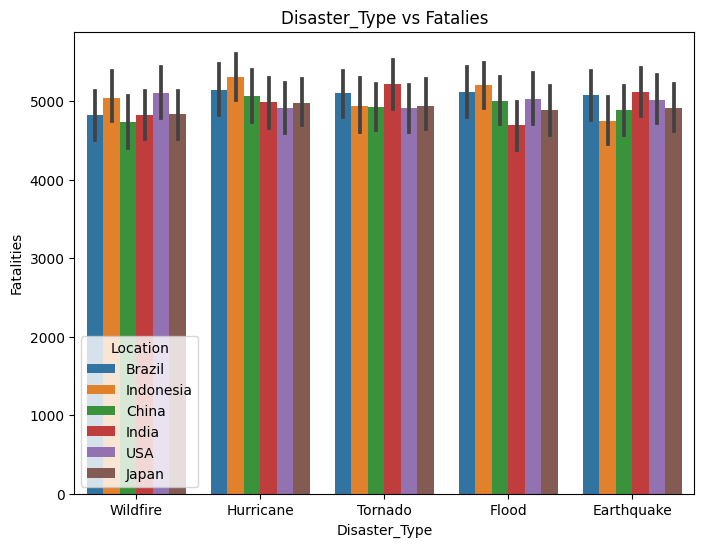

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x='Disaster_Type', y='Fatalities', hue='Location', data=df)
plt.title("Disaster_Type vs Fatalies")
plt.xlabel("Disaster_Type")
plt.ylabel("Fatalities")
plt.show()

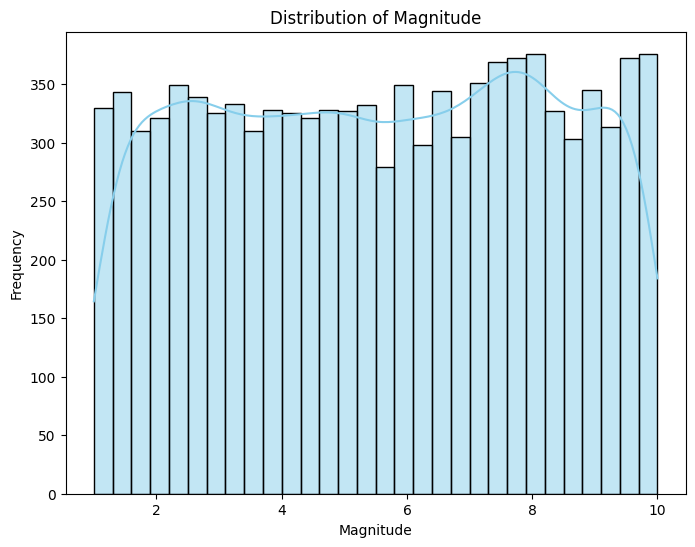

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='skyblue' )
plt.title("Distribution of Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

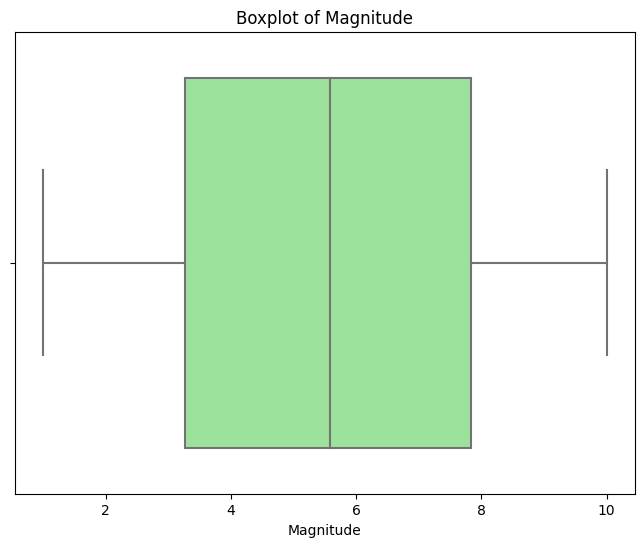

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Magnitude'], color='lightgreen')
plt.title("Boxplot of Magnitude")
plt.xlabel("Magnitude")
plt.show()

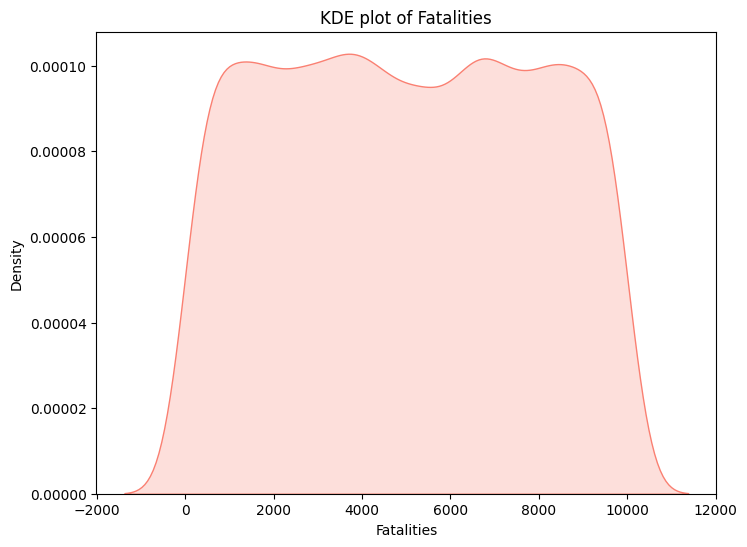

In [21]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['Fatalities'], shade=True, color='salmon')
plt.title("KDE plot of Fatalities")
plt.xlabel("Fatalities")
plt.ylabel("Density")
plt.show()

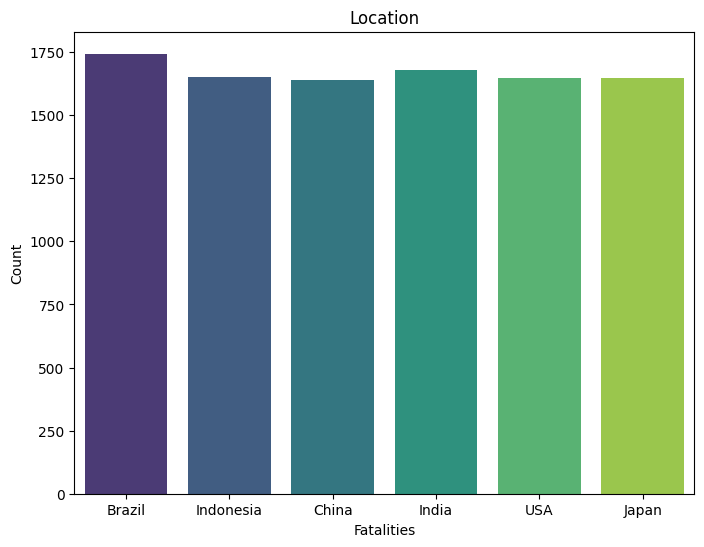

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x="Location", data=df, palette='viridis')
plt.title("Location")
plt.xlabel("Fatalities")
plt.ylabel("Count")
plt.show()

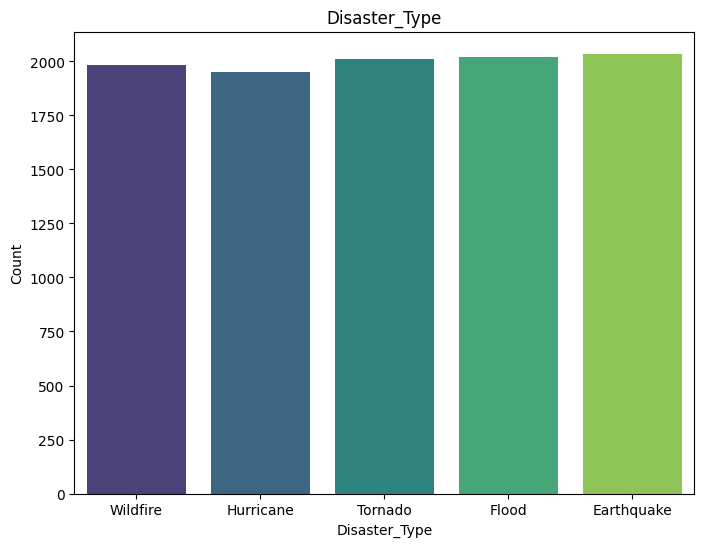

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x="Disaster_Type", data=df, palette='viridis')
plt.title("Disaster_Type")
plt.xlabel("Disaster_Type")
plt.ylabel("Count")
plt.show()

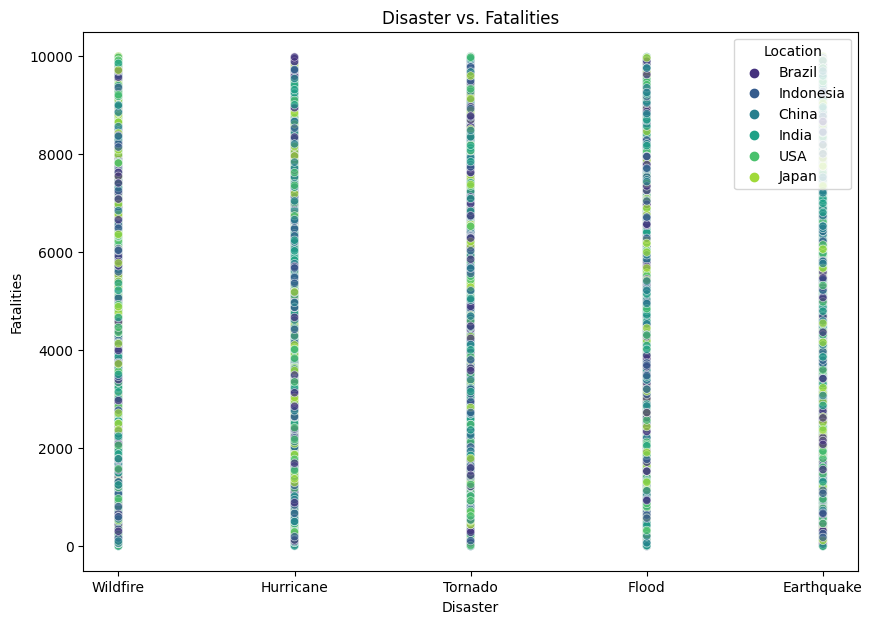

In [27]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='Disaster_Type',
    y='Fatalities', 
    hue='Location', 
    palette='viridis', 
    alpha=0.7
)
plt.title('Disaster vs. Fatalities')
plt.xlabel('Disaster')
plt.ylabel('Fatalities')
plt.legend(title='Location')
plt.show()

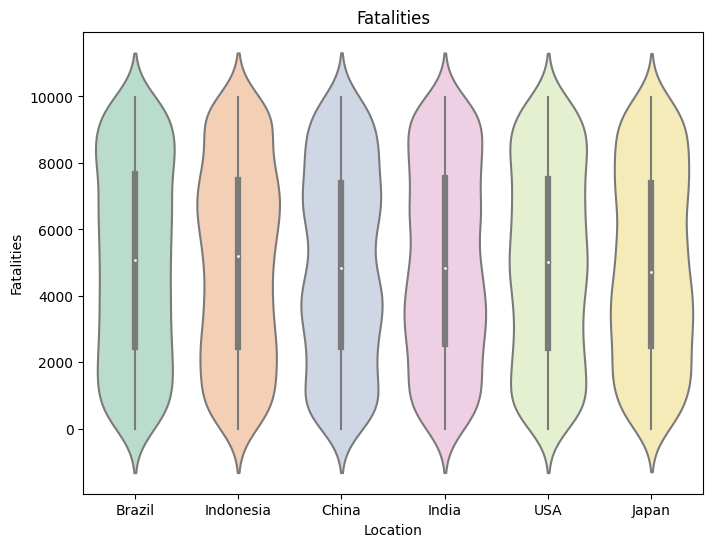

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Location', y='Fatalities', data=df, palette='Pastel2')
plt.title('Fatalities')
plt.xlabel('Location')
plt.ylabel('Fatalities')
plt.show()

<Axes: xlabel='Disaster_Type', ylabel='Fatalities'>

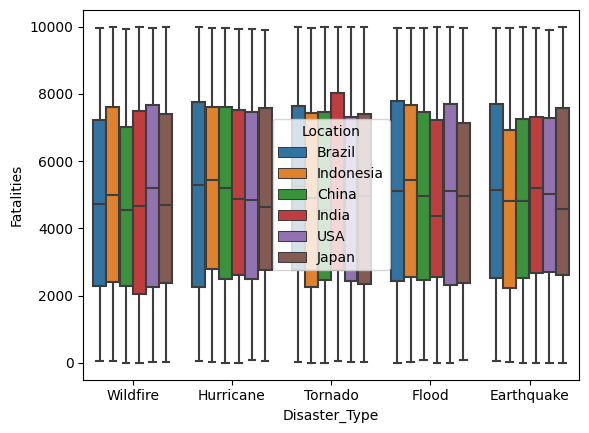

In [10]:
sns.boxplot(x='Disaster_Type', y='Fatalities', hue='Location', data=df)

<Axes: xlabel='Disaster_Type', ylabel='Fatalities'>

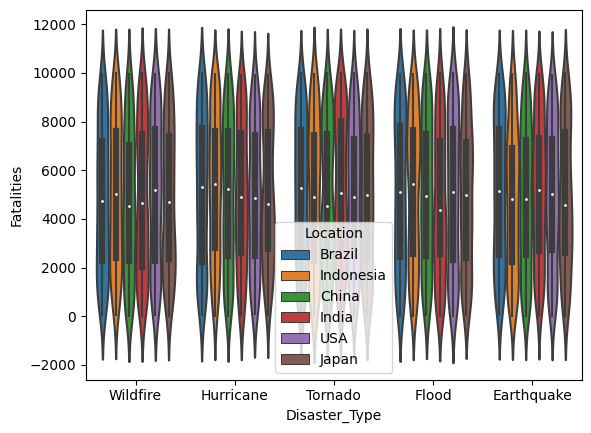

In [11]:
sns.violinplot(x='Disaster_Type', y='Fatalities', hue='Location', data=df)

<Axes: xlabel='Disaster_Type', ylabel='Fatalities'>

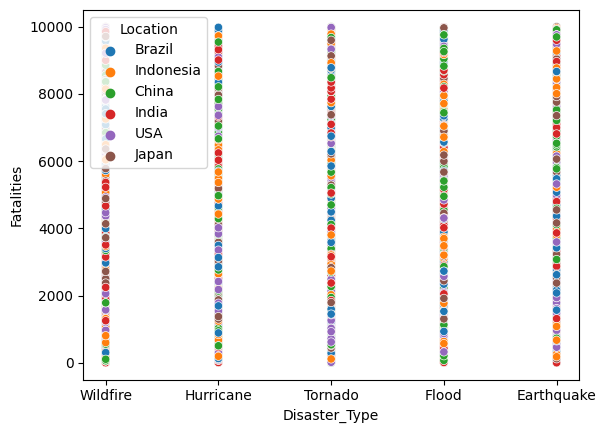

In [12]:
sns.scatterplot(x='Disaster_Type', y='Fatalities', hue='Location', data=df)

<Axes: xlabel='Disaster_Type', ylabel='count'>

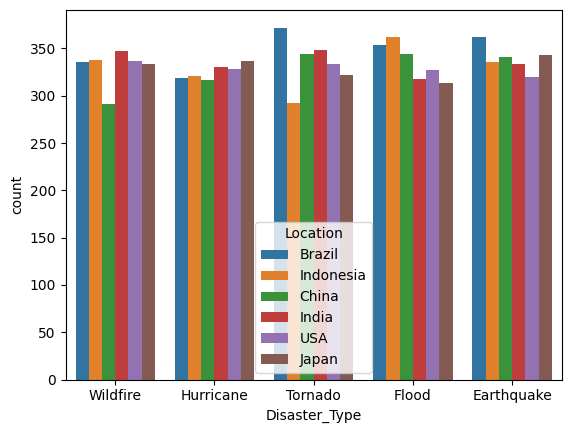

In [13]:
sns.countplot(x='Disaster_Type', hue='Location', data=df)

<Axes: xlabel='Disaster_Type', ylabel='Fatalities'>

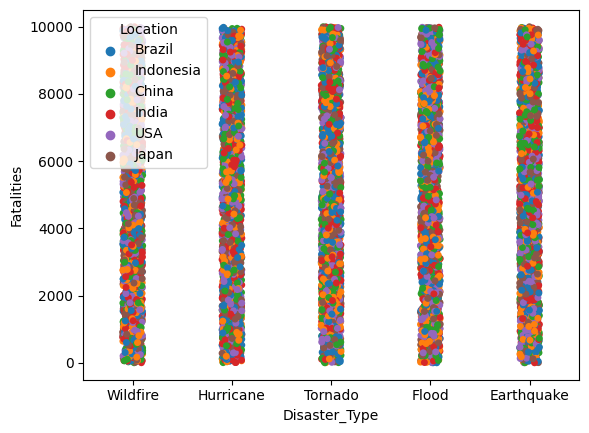

In [15]:
sns.stripplot(x='Disaster_Type', y='Fatalities', hue='Location', data=df)

<Axes: xlabel='Disaster_Type', ylabel='Fatalities'>

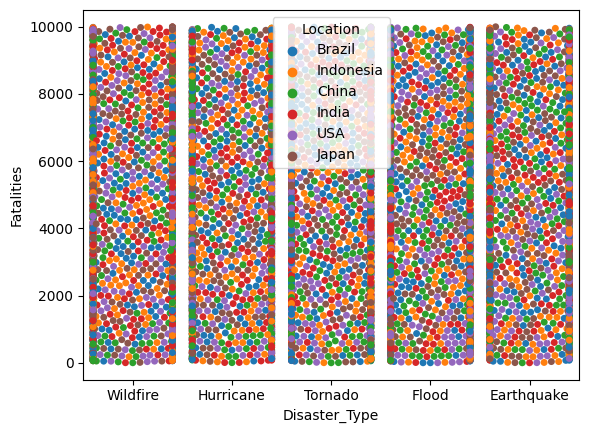

In [16]:
sns.swarmplot(x='Disaster_Type', y='Fatalities', hue='Location', data=df)

# Date Time conversion

In [31]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df.head())


   Disaster_ID Disaster_Type   Location  Magnitude                Date  \
0            1      Wildfire     Brazil   6.267393 2024-01-01 00:00:00   
1            2     Hurricane  Indonesia   6.649358 2024-01-01 01:00:00   
2            3       Tornado      China   9.724366 2024-01-01 02:00:00   
3            4         Flood      India   1.702505 2024-01-01 03:00:00   
4            5         Flood     Brazil   7.917748 2024-01-01 04:00:00   

   Fatalities  Economic_Loss($)  Year  Month  Day  
0        9706      6.509790e+08  2024      1    1  
1        2233      5.538357e+08  2024      1    1  
2         478      6.910998e+07  2024      1    1  
3        2867      8.474880e+08  2024      1    1  
4         776      6.449297e+08  2024      1    1  


# Categorical Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for Disaster_Type
label_encoder = LabelEncoder()
df['Disaster_Type'] = label_encoder.fit_transform(df['Disaster_Type'])

# One-Hot Encoding for Location
df = pd.get_dummies(df, columns=['Location'])

print(df.head())


   Disaster_ID  Disaster_Type  Magnitude                Date  Fatalities  \
0            1              4   6.267393 2024-01-01 00:00:00        9706   
1            2              2   6.649358 2024-01-01 01:00:00        2233   
2            3              3   9.724366 2024-01-01 02:00:00         478   
3            4              1   1.702505 2024-01-01 03:00:00        2867   
4            5              1   7.917748 2024-01-01 04:00:00         776   

   Economic_Loss($)  Year  Month  Day  Location_Brazil  Location_China  \
0      6.509790e+08  2024      1    1             True           False   
1      5.538357e+08  2024      1    1            False           False   
2      6.910998e+07  2024      1    1            False            True   
3      8.474880e+08  2024      1    1            False           False   
4      6.449297e+08  2024      1    1             True           False   

   Location_India  Location_Indonesia  Location_Japan  Location_USA  
0           False           

# Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_columns = ['Magnitude', 'Economic_Loss($)', 'Fatalities']

# Apply standard scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())


   Disaster_ID  Disaster_Type  Magnitude                Date  Fatalities  \
0            1              4   0.270398 2024-01-01 00:00:00    1.627973   
1            2              2   0.416232 2024-01-01 01:00:00   -0.948951   
2            3              3   1.590270 2024-01-01 02:00:00   -1.554130   
3            4              1  -1.472476 2024-01-01 03:00:00   -0.730328   
4            5              1   0.900504 2024-01-01 04:00:00   -1.451370   

   Economic_Loss($)  Year  Month  Day  Location_Brazil  Location_China  \
0          0.510292  2024      1    1             True           False   
1          0.170770  2024      1    1            False           False   
2         -1.523375  2024      1    1            False            True   
3          1.197103  2024      1    1            False           False   
4          0.489149  2024      1    1             True           False   

   Location_India  Location_Indonesia  Location_Japan  Location_USA  
0           False           

# Feature Selection

In [37]:
# Drop unnecessary columns
df = df.drop(columns=['Disaster_ID', 'Date'])

print(df.head())


   Disaster_Type  Magnitude  Fatalities  Economic_Loss($)  Year  Month  Day  \
0              4   0.270398    1.627973          0.510292  2024      1    1   
1              2   0.416232   -0.948951          0.170770  2024      1    1   
2              3   1.590270   -1.554130         -1.523375  2024      1    1   
3              1  -1.472476   -0.730328          1.197103  2024      1    1   
4              1   0.900504   -1.451370          0.489149  2024      1    1   

   Location_Brazil  Location_China  Location_India  Location_Indonesia  \
0             True           False           False               False   
1            False           False           False                True   
2            False            True           False               False   
3            False           False            True               False   
4             True           False           False               False   

   Location_Japan  Location_USA  
0           False         False  
1           

# Splitting data into Train and Test sets

In [39]:
from sklearn.model_selection import train_test_split

# Define the target variable (e.g., predicting 'Fatalities')
X = df.drop(columns=['Fatalities'])  # Features
y = df['Fatalities']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(8000, 12) (2000, 12)


# Building a Machine Learning Model

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)


[-0.05853473 -0.04456217  0.14551228 ... -0.0618727   0.25938591
  0.25400999]


# Evaluating the Model

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error: 1.1039572835491154
R-Squared: -0.07918258454851546


# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Initialize GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 300}


# Feature Importance

In [42]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Print feature importance
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance}')


Disaster_Type: 0.07200621362787192
Magnitude: 0.27294697400256107
Economic_Loss($): 0.2724361132832797
Year: 0.011666595520303436
Month: 0.10434325301389821
Day: 0.15685690904248126
Location_Brazil: 0.018974588069283944
Location_China: 0.01744269928209765
Location_India: 0.017850815707583203
Location_Indonesia: 0.01944410163206796
Location_Japan: 0.018260231100404943
Location_USA: 0.017771505718166547
